In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-analysis-arima-model/AirPassengers.csv


In [4]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

In [6]:
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('/kaggle/input/time-series-analysis-arima-model/AirPassengers.csv', parse_dates=['Month'], index_col=['Month'])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
data = pd.DataFrame(df['#Passengers'])

In [11]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
ts = data['#Passengers'].resample('MS').sum()
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: #Passengers, dtype: int64

<Axes: xlabel='Month'>

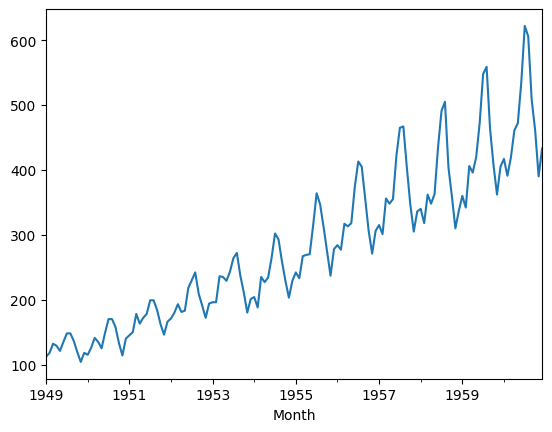

In [13]:
ts.plot()

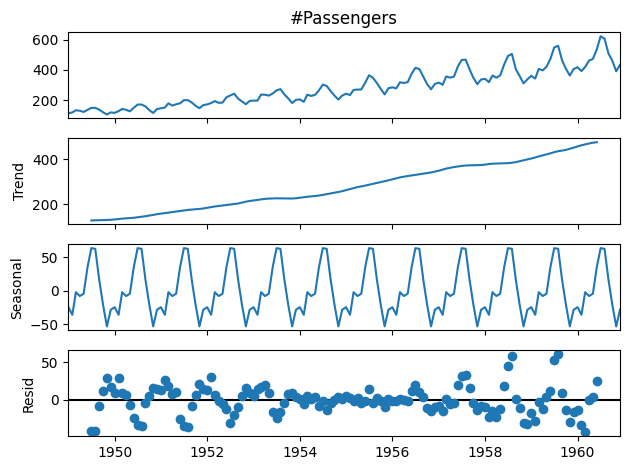

In [14]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

# Checking Stationarity:

In [15]:
adftest = adfuller(ts)
adftest[1]

0.9920653980124213

In [16]:
len(ts)

144

In [17]:
train=ts[:110]
test=ts[110:]

In [18]:
stepwise_fit = auto_arima(train, trace=True, suppress_warnings=True, seasonal=True,)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1020.364, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1013.922, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1009.002, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1018.955, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1005.751, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1006.540, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1009.285, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1004.232, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1007.308, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1012.237, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1000.267, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1007.8

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -495.935
Date:                Fri, 04 Oct 2024   AIC                            999.870
Time:                        17:33:18   BIC                           1010.636
Sample:                    01-01-1949   HQIC                          1004.236
                         - 02-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5498      0.122      4.506      0.000       0.311       0.789
ma.L1         -0.2570      0.123     -2.092      0.036      -0.498      -0.016
ma.L2         -0.5269      0.086     -6.107      0.000      -0.696      -0.358
sigma2       521.0945     94.367      5.522      0.000     336.138     706.051
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 4.11
Prob(Q):                              0.63   Prob(JB):                         0.13
Heteroskedasticity (H):               4.87   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
pred = stepwise_fit.predict(start=len(train), end=(len(ts)-1))

<Axes: xlabel='Month'>

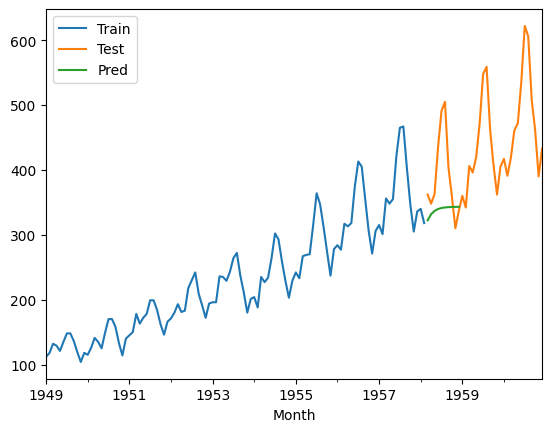

In [26]:
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
pred.plot(legend=True, label='Pred')

In [61]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(train, order=(1,1,2), seasonal_order=(1,1,2,12))
results = mod.fit()
# print(results.summary())

# results.plot_diagnostics(figsize=(15,12))
# plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25661D+00    |proj g|=  1.78815D-01

At iterate    5    f=  3.23371D+00    |proj g|=  1.78181D-02

At iterate   10    f=  3.22480D+00    |proj g|=  3.41741D-02

At iterate   15    f=  3.20517D+00    |proj g|=  5.35700D-03

At iterate   20    f=  3.20251D+00    |proj g|=  2.08653D-03

At iterate   25    f=  3.20179D+00    |proj g|=  2.50634D-03

At iterate   30    f=  3.20156D+00    |proj g|=  1.52174D-03

At iterate   35    f=  3.20145D+00    |proj g|=  9.73939D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  3.20143D+00    |proj g|=  5.40909D-04

At iterate   45    f=  3.20143D+00    |proj g|=  9.79861D-05

At iterate   50    f=  3.20143D+00    |proj g|=  1.42220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     78      2     0     0   1.422D-05   3.201D+00
  F =   3.2014260939070529     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [62]:
pred_seasonal = results.predict(start=len(train), end=(len(ts)-1))

<Axes: xlabel='Month'>

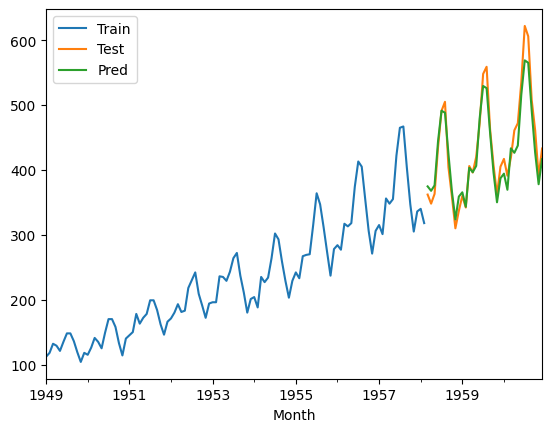

In [65]:
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
pred_seasonal.plot(legend=True, label='Pred')

In [66]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(ts, order=(1,1,2), seasonal_order=(1,1,2,12))  #also play with "trend" argument
results = mod.fit()
# print(results.summary())

# results.plot_diagnostics(figsize=(15,12))
# plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52005D+00    |proj g|=  7.92885D-02

At iterate    5    f=  3.51292D+00    |proj g|=  9.92596D-03

At iterate   10    f=  3.51058D+00    |proj g|=  4.75839D-03

At iterate   15    f=  3.50841D+00    |proj g|=  1.03692D-01

At iterate   20    f=  3.48395D+00    |proj g|=  2.41561D-02

At iterate   25    f=  3.47267D+00    |proj g|=  1.25340D-02

At iterate   30    f=  3.46704D+00    |proj g|=  2.08459D-03

At iterate   35    f=  3.46653D+00    |proj g|=  7.54432D-04

At iterate   40    f=  3.46651D+00    |proj g|=  1.24501D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [70]:
pred_future = results.predict(start=len(ts), end=(len(ts)+36))

<Axes: xlabel='Month'>

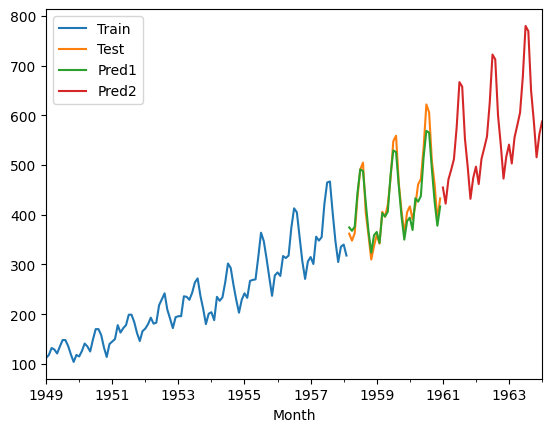

In [74]:
train.plot(legend=True, label='Train')
test.plot(legend=True, label='Test')
pred_seasonal.plot(legend=True, label='Pred1')
pred_future.plot(legend=True, label='Pred2')